In [98]:
import pyworld
import kaldiio.python_wave as wave
import numpy as np
import matplotlib.pyplot as plt

In [99]:
fd = "/home/amogus/Research/SVCC/serenade/egs/gtsinger/ssc1/downloads/smol2/Breathy/song1/Breathy_Group/0000.wav"

wd = wave.open(fd)
rate = wd.getframerate()
data = wd.readframes(wd.getnframes())
audio = np.frombuffer(data, dtype=np.int16)

f0, t = pyworld.harvest(
    audio.astype(np.float64),
    fs=rate,
    # f0_floor=minf0,
    # f0_ceil=maxf0,
    frame_period=10,
)

# print(f0)

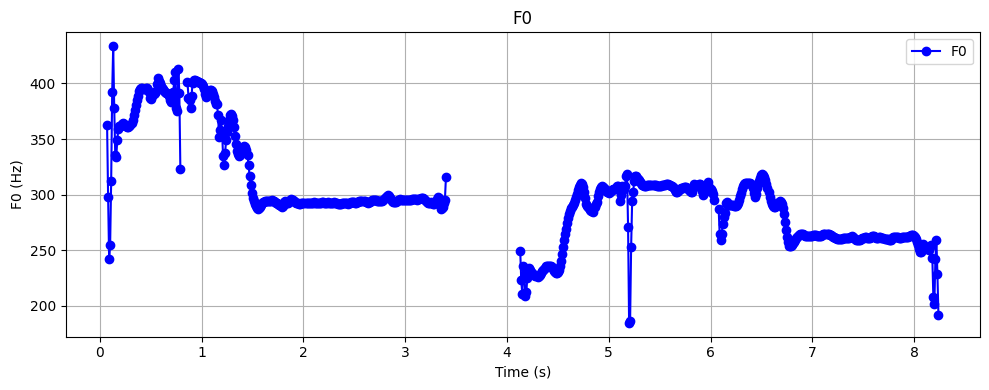

In [100]:
# time_axis = np.arange(len(f0)) * (1/rate)

f0_values_clean = np.where(f0 == 0, np.nan, f0)

# Plot the F0 contour
plt.figure(figsize=(10, 4))
plt.plot(t, f0_values_clean, marker='o', label="F0", color='blue')
plt.title("F0")
plt.xlabel("Time (s)")
plt.ylabel("F0 (Hz)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

(850,)
(850,)


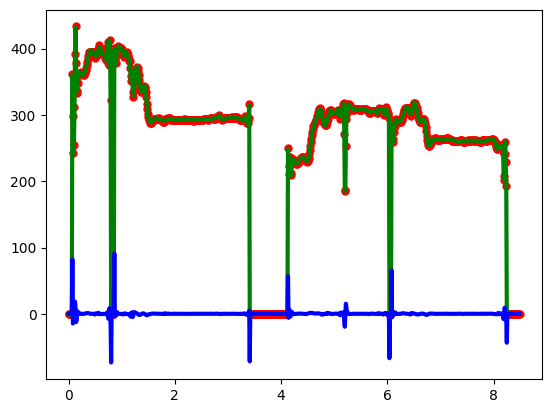

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
rng = np.random.default_rng()
x = t
y = f0
plt.plot(x, y, 'ro', ms=5)

spl = UnivariateSpline(x, y)
plt.plot(x, spl(x), 'g', lw=3)

print(spl(x).shape)
print(y.shape)

f0min = 130
f0max = 440
thshld = f0min * .9
time = t
f0_normed = f0 / f0max
spliner = UnivariateSpline(time, f0_normed, s=0.01)
f0_smoothened = spliner(time)
time_interval = time[1] - time[0]
f0_fluc = [0]
f0_fluc_ori = [0]

for i in range(1, len(f0_smoothened)):
    fluc = 0
    # if (f0[i] < thshld or f0[i-1] < thshld):
    #     fluc = 0
    # else:
    fluc = (f0_smoothened[i] - f0_smoothened[i-1]) / time_interval
    f0_fluc.append(fluc)

    fluc_ori = (f0_normed[i] - f0_normed[i-1]) / time_interval
    f0_fluc_ori.append(fluc_ori)

f0_fluc = np.array(f0_fluc)
f0_fluc_ori = np.array(f0_fluc_ori)

# plt.plot(x, f0_fluc, 'b', lw=3)
plt.plot(x, f0_fluc_ori, 'b', lw=3)

# spl.set_smoothing_factor(0.5)
# plt.plot(x, spl(x), 'b', lw=3)
# plt.show()

In [102]:
time = t
spliner = UnivariateSpline(time, f0)
f0_smoothened = spliner(time)
time_interval = time[1] - time[0]
f0_fluc = [f0_smoothened[0]/time_interval]

for i in range(1, len(f0_smoothened)):
    fluc = (f0_smoothened[i] - f0_smoothened[i-1]) / time_interval
    f0_fluc.append(fluc)

f0_fluc = np.array(f0_fluc)

print(f0_fluc)

[ 7.39027695e+00 -6.69857429e+01  2.34831352e+02 -4.37978091e+02
  5.08744936e+02 -4.49347600e+02  4.03000675e+02  3.58442662e+04
 -6.10230824e+03 -5.82612480e+03  1.49680293e+03  5.34830958e+03
  8.52708349e+03  3.79365108e+03 -5.74053998e+03 -3.66090448e+03
 -2.60787072e+02  9.17670701e+02  1.06269294e+03  6.24814741e+02
  2.17952427e+02 -4.41492779e+00 -7.01925943e+01 -9.10016603e+01
 -9.47473976e+01 -8.14298062e+01 -5.10488862e+01 -3.60463748e+00
  5.73428344e+01  1.17553107e+02  1.73466076e+02  2.25081740e+02
  2.72400099e+02  3.15421154e+02  3.54144904e+02  3.85592652e+02
  3.97849600e+02  3.87937052e+02  3.55855006e+02  3.01603463e+02
  2.25182422e+02  1.26591885e+02  1.54826853e+01 -6.95418336e+01
 -1.18830836e+02 -1.32384323e+02 -1.17924127e+02 -1.06337583e+02
 -1.05346523e+02 -1.09027812e+02 -9.36889010e+01 -5.34066539e+01
  1.18189295e+01  1.01987849e+02  2.17100105e+02  3.35290454e+02
  3.69097921e+02  2.96657263e+02  1.17968481e+02 -1.26875404e+02
 -2.77502296e+02 -2.93819

[-0.04588663  0.88943928  0.80278663 -0.1023102  -0.97699428 -0.753148
  0.30218544  0.96660235  0.54994335 -0.69869592]
[ 0.24681123  0.57924149  0.38143285 -0.05143966 -0.424201   -0.44167615
  0.04279351  0.581801    0.57942291 -0.56026416]


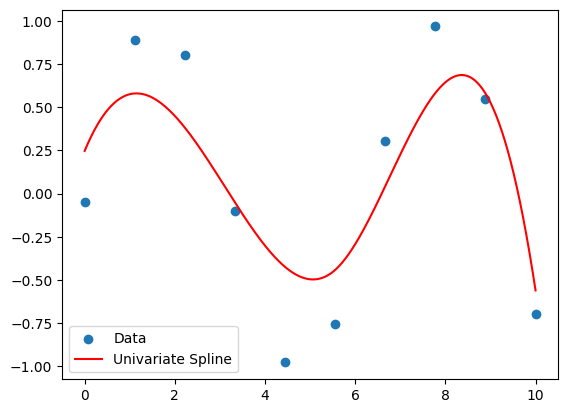

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Sample data
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)

# Fit a smoothing spline
spline = UnivariateSpline(x, y, s=1)  # s is the smoothing factor

# Evaluate the spline
x_dense = np.linspace(0, 10, 1000)
y_spline = spline(x_dense)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x_dense, y_spline, label='Univariate Spline', color='red')
plt.legend()

# spline.set_smoothing_factor(0.5)
# y_spline = spline(x_dense)
# plt.plot(x_dense, y_spline, 'b', lw=3)

# spline.set_smoothing_factor(0.001)
# y_spline = spline(x_dense)
# plt.plot(x_dense, y_spline, 'g', lw=3)
# plt.show()

print(y)
print(spline(x))